<a href="https://colab.research.google.com/github/AviratGupta/AviratGupta-geeksman-AI-project2-Avirat/blob/master/face_detection_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
With ML Kit's face detection API, you can detect faces in an image, identify key facial features, and get the contours of detected faces.

With face detection, you can get the information you need to perform tasks like embellishing selfies and portraits, or generating avatars from a user's photo. Because ML Kit can perform face detection in real time, you can use it in applications like video chat or games that respond to the player's expressions.

# **Overview**

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


Setting up an environment for kaggle api.

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

To download the required dataset by copying api from kaggle and run in command line.we use ! in google colab to execute any command.


In [ ]:
!kaggle datasets download -d aviratgupta/face-recognition

 97% 333M/343M [00:04<00:00, 84.2MB/s]
100% 343M/343M [00:04<00:00, 77.6MB/s]


unzipping the zip file which we have downloaded by command line.

In [ ]:
!unzip "*.zip"

# importing important libraries like fastai,warning.

we ignore all the warnings we ger in future using "ignore".

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

initialising batch size as 64.

Batch size is a term used in deep learning and refers to the number of training examples utilized in one iteration.

we have to give a path to shows images and we can also give the transformation so that machine can read both normal and flipped image.

In [ ]:
bs = 64

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

some sample images on our dataset.

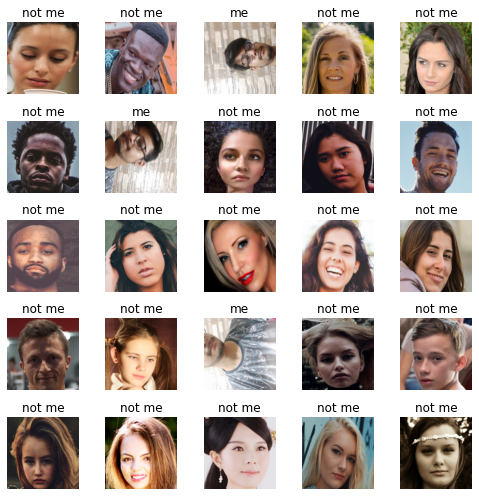

In [ ]:
data.show_batch(rows=5, figsize=(7,7))

In [ ]:
print(data.classes)
len(data.classes)


['me', 'not me']


2

# Time to learn our model..

The most important functions of this module are cnn_learner. They will help you define a Learner using a pretrained model.

***resnet 50***

ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.
here we are using fingers as object.

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


fit_one_cycle will launch a training using the 1cycle policy to help you train your model faster.

here 4 is the number of time we want to train our model known as epochs.

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.100516,0.000236,1.000000,01:01
1,0.045936,0.000097,1.000000,01:01
2,0.024654,0.000024,1.000000,01:00
3,0.014741,0.000021,1.000000,01:00


till now , we have train our model.

Now we have to save in our google drive using (os.mkdir)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

makedirs() creates all the intermediate directories if they don't exist (just like mkdir -p in bash).

mkdir() can create a single sub-directory, and will throw an exception if intermediate directories that don't exist are specified.

we create a folder named face-recognition.

In [ ]:
os.makedirs("/content/drive/My Drive/face-recognition",exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/face-recognition"

we now save our model using learn.save.

In [ ]:
learn.save(my_dir+"/Stage-1")

We will now load our trained data.

In [ ]:
learn.load("/content/drive/My Drive/face-recognition/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (1244 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
not me,not me,not me,not me,not me
Path: /content;

Valid: LabelList (310 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
not me,me,not me,me,not me
Path: /content;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

we will make a export.pkl file from inbuilt library pickle from python.


In [ ]:
learn.export(my_dir+"/export.pkl")

In [ ]:
my_dir="/content/drive/My Drive/face-recognition"
!pip install -U kora
from kora.drive import upload_public
my_url = upload_public(my_dir+"/export.pkl")
my_url

'https://drive.google.com/uc?id=1ny6XSR4XJBO7im0s7F0TClGEWewcLZXY'

performing classification of our images.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

prediction of our images.

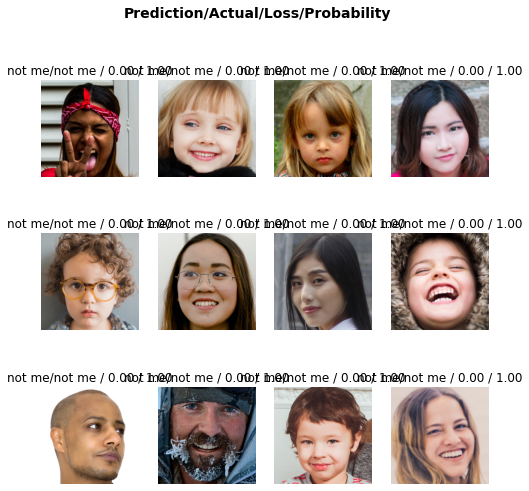

In [ ]:
interp.plot_top_losses(12, figsize=(8,8))

**confusion matrix**

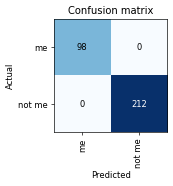

In [ ]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=60)

**most confused matrix**

In [ ]:
interp.most_confused(min_val=2)

[]